In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras import layers

In [ ]:
flowers_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [ ]:
import pathlib
flowers_data = tf.keras.utils.get_file('flower_photos', origin=flowers_url, untar=True)
flowers_data = pathlib.Path(flowers_data)

In [ ]:
print(flowers_data)

/root/.keras/datasets/flower_photos


/root/.keras/datasets/flower_photos/sunflowers/2067882323_8de6623ffd.jpg


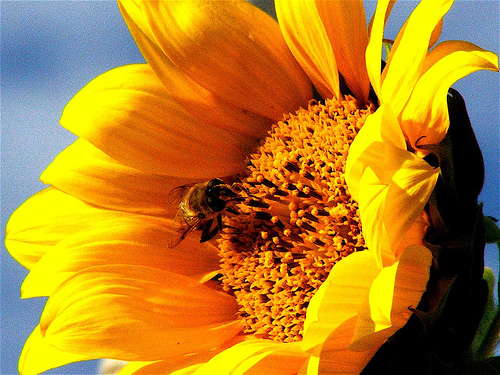

In [ ]:
all_sunflowers = list(flowers_data.glob('sunflowers/*'))
import PIL
print(all_sunflowers[2])
PIL.Image.open(str(all_sunflowers[2]))

In [ ]:
height,width=180,180

In [ ]:
training_batch_size=32

In [ ]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
flowers_data,
validation_split=0.2,
subset="training",
seed=123,
image_size=(height,width),
batch_size=training_batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
image_cat = train_set.class_names
print(image_cat)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
flowers_data,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(height, width),
batch_size=training_batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
from tensorflow.keras.models import Sequential
dnn_model = Sequential()
imported_model= tf.keras.applications.ResNet50(include_top=False,
input_shape=(180,180,3),
pooling='avg',classes=5,
weights='imagenet')
for layer in imported_model.layers:
  layer.trainable=False

In [ ]:
from tensorflow.python.keras.layers import Dense, Flatten

In [ ]:
dnn_model.add(imported_model)
dnn_model.add(Flatten())
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(5, activation='softmax'))

In [ ]:
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_6 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_7 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_8 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
__________________________________

In [ ]:
from tensorflow.keras.optimizers import Adam
dnn_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#python
history = dnn_model.fit(
train_set,
validation_data=validation_set,
epochs=10
)

Epoch 1/10
92/92 [==============================] - 497s 5s/step - loss: 0.6384 - accuracy: 0.7820 - val_loss: 0.4634 - val_accuracy: 0.8311
Epoch 2/10
92/92 [==============================] - 493s 5s/step - loss: 0.2843 - accuracy: 0.8917 - val_loss: 0.3780 - val_accuracy: 0.8597
Epoch 3/10
92/92 [==============================] - 497s 5s/step - loss: 0.1623 - accuracy: 0.9397 - val_loss: 0.3933 - val_accuracy: 0.8556
Epoch 4/10
92/92 [==============================] - 487s 5s/step - loss: 0.0920 - accuracy: 0.9748 - val_loss: 0.4890 - val_accuracy: 0.8515
Epoch 5/10
92/92 [==============================] - 486s 5s/step - loss: 0.0513 - accuracy: 0.9884 - val_loss: 0.3943 - val_accuracy: 0.8815
Epoch 6/10
92/92 [==============================] - 484s 5s/step - loss: 0.0290 - accuracy: 0.9956 - val_loss: 0.4114 - val_accuracy: 0.8760
Epoch 7/10
92/92 [==============================] - 486s 5s/step - loss: 0.0179 - accuracy: 0.9966 - val_loss: 0.3913 - val_accuracy: 0.8883
Epoch 8/10
92

In [ ]:
import cv2
import numpy as np
image=cv2.imread(str(all_sunflowers[1]))
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [ ]:
model_pred=dnn_model.predict(image)

1/1 [==============================] - 1s 1s/step


In [ ]:
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)

The predicted category is sunflowers
